##Multiple LSTMs

Build a model with multiple LSTM layers (Long Short-Term Memory) 

##Download and Prep the Dataset

In [1]:
import tensorflow_datasets as tfds

#Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

#Get the tokenizer
tokenizer = info.features ['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete50W7TZ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete50W7TZ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete50W7TZ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Increase the `BATCH_SIZE` to make things faster 

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

#Get the train and test splits 
train_data, test_data = dataset['train'], dataset['test'],

#Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

#Batch and pad the datasets to the maximum length of the sequences 
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

##Build and compile the model

You can build multiple layer LSTM models by simply appending another `LSTM` layer in your `Sequential` model and enabling the `return_sequences` flag to `True`

This is because an LSTM layer expects a sequence input so if the previous layer is also an LSTM, then it should output a sequence as well

In [3]:
import tensorflow as tf

# Hyper Parameters 
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
lstm3_dim = 16
dense_dim = 64

#Build the model 
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm3_dim)),
      tf.keras.layers.Dense(dense_dim, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')

])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 64)         41216     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                        

In [4]:
#Set the training parameters 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##Train the model

The additional LSTM layers will lengthen the training time compared to the previous lab so enable the Colab GPU to run it faster

In [5]:
NUM_EPOCHS = 10

#Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 72s 614ms/step - loss: 0.6076 - accuracy: 0.6615 - val_loss: 0.5550 - val_accuracy: 0.7657
Epoch 2/10
98/98 [==============================] - 59s 604ms/step - loss: 0.6298 - accuracy: 0.6499 - val_loss: 0.6532 - val_accuracy: 0.5980
Epoch 3/10
98/98 [==============================] - 61s 620ms/step - loss: 0.5556 - accuracy: 0.7099 - val_loss: 0.6102 - val_accuracy: 0.5730
Epoch 4/10
98/98 [==============================] - 61s 614ms/step - loss: 0.4746 - accuracy: 0.7806 - val_loss: 0.5000 - val_accuracy: 0.7748
Epoch 5/10
98/98 [==============================] - 60s 611ms/step - loss: 0.4485 - accuracy: 0.8017 - val_loss: 0.4182 - val_accuracy: 0.8084
Epoch 6/10
98/98 [==============================] - 61s 616ms/step - loss: 0.3110 - accuracy: 0.8770 - val_loss: 0.3570 - val_accuracy: 0.8450
Epoch 7/10
98/98 [==============================] - 60s 611ms/step - loss: 0.2489 - accuracy: 0.9053 - val_loss: 0.3681 - val_accuracy: 0.8457

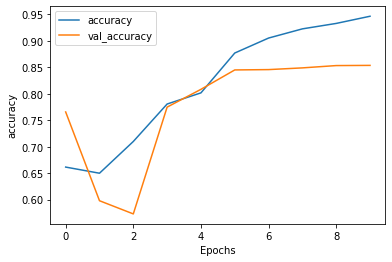

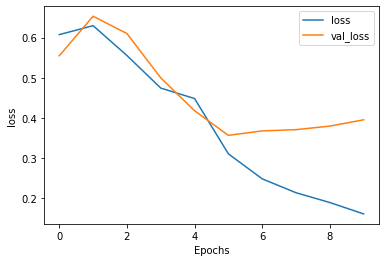

In [6]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")